In [34]:
# from google.colab import drive
import io
import pandas as pd
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
import os
import zipfile
import shutil
import random
import os
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
from sklearn.datasets import load_files
# from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
# from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image
from PIL import Image
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# from ultralytics import YOLO
# Pretty display for notebooks
%matplotlib inline

In [35]:
Accident_Images = '/kaggle/input/synthetic-dataset-for-accident-detection/AccidentData/AccidentData'

No_Accident_Images = '/kaggle/input/synthetic-dataset-for-accident-detection/NonAccidentData/NonAccidentData'

MODEL_PATH = '/kaggle/working/'

In [42]:
def get_images(directory_path, label_value):
    images_paths_list = []
    labels_list = []
    file_list = os.listdir(directory_path)
    for file_name  in file_list:
        if file_name .endswith(".jpg"):
            file_path = os.path.join(directory_path, file_name)
            # Open the image using PIL
            try:
#                 image = Image.open(file_path)
                images_paths_list.append(file_path)
                labels_list.append(label_value)
            except Exception as e:
                print(f"Error loading image '{file_name}': {e}")
        
    return images_paths_list, labels_list

In [43]:
labeled_acc_image_path, acc_labels = get_images('/kaggle/input/labeled-car-accident/CarDetection/accident_data', 1)

In [44]:
labeled_no_acc_images_path, no_acc_labels = get_images('/kaggle/input/labeled-car-accident/CarDetection/no_accident_data', 0)

In [45]:
images_path = labeled_acc_image_path + labeled_no_acc_images_path
labels = acc_labels + no_acc_labels

In [47]:
labels = np.array(labels).reshape((len(labels), 1))

In [51]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path,color_mode = 'grayscale', target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (1, 224, 224, 1)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 1) and return 4D tensor
    return np.expand_dims(x, axis=0)

In [52]:
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [53]:
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

100%|██████████| 400/400 [00:07<00:00, 54.94it/s]


In [62]:
xtest = test_images_path
ytest = test_labels

In [63]:
xtest

['/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic9570.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic20537.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic19859.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic14072.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic16193.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic19817.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic2996.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic23361.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic17089.jpg',
 '/kaggle/input/labeled-car-accident/CarDetection/accident_data/CCTVRealistic3702.jpg']

In [64]:
test_tensors = paths_to_tensor(xtest).astype('float32')/255 - 0.5

100%|██████████| 10/10 [00:00<00:00, 55.75it/s]


In [71]:
# Make predictions
predictions = model.predict(test_tensors)

# Threshold for mapping to binary labels
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

1/1 [==============================] - 0s 85ms/step


In [72]:
# Map binary labels to meaningful class names
class_names = ['no accident', 'accident']
mapped_prediction = class_names[binary_predictions[0, 0]]

The model predicts: accident


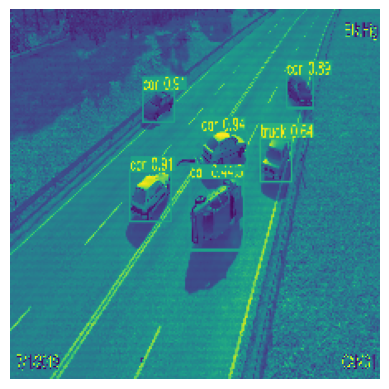

The model predicts: accident


In [89]:
import matplotlib.pyplot as plt
plt.imshow(test_tensors[5])
plt.axis('off')  # Hide axes
plt.show()

print(f'The model predicts: {mapped_prediction}')

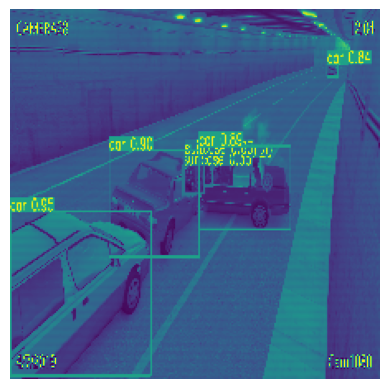

The model predicts: accident


In [88]:
import matplotlib.pyplot as plt
plt.imshow(test_tensors[9])
plt.axis('off')  # Hide axes
plt.show()

print(f'The model predicts: {mapped_prediction}')

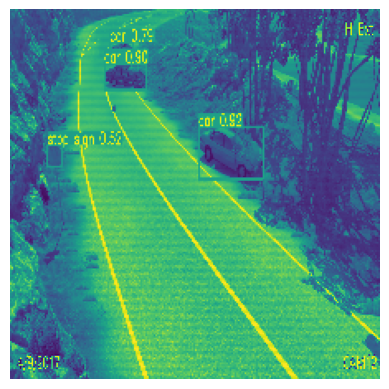

The model predicts: accident


In [73]:
import matplotlib.pyplot as plt
plt.imshow(test_tensors[0])
plt.axis('off')  # Hide axes
plt.show()

print(f'The model predicts: {mapped_prediction}')

In [ ]:
ypred_class = np.argmax(predictions,axis=1)
yvalid = np.argmax(ytest,axis=1)

In [86]:
accuracy = accuracy_score(yvalid, ypred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yvalid, ypred_class,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yvalid,ypred_class,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yvalid,ypred_class,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.980392
Precision: 0.961538
Recall: 0.970874
F1 score: 0.934579
